In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
data = pd.read_csv(r'C:\Users\Home\Downloads\AAPL.csv')  # Replace 'your_file.csv' with the actual file name


In [3]:
# Extract the 'Close' prices
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(close_prices)


In [5]:
train_data = normalized_data[:-30]  # Use the first n-30 records for training
test_data = normalized_data[-30:]  # Use the last 30 records for testing


In [6]:
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)


In [7]:
lookback = 10  # Number of previous time steps to consider
epochs = 100  # Number of training epochs
batch_size = 32  # Batch size for training


In [8]:
train_X, train_y = prepare_data(train_data, lookback)

# Reshape the input data to match the LSTM input shape
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))


In [9]:
model = Sequential()
model.add(LSTM(64, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [10]:
model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size)


Epoch 1/100
7/7 [==============================] - 3s 7ms/step - loss: 0.1180
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0209
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0178
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0055
Epoch 12/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 13/100
7/7 [==============================] - 0s 6ms/st

In [11]:
test_X, test_y = prepare_data(test_data, lookback)

# Reshape the input data to match the LSTM input shape
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))


In [14]:
predictions = model.predict(test_X)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(test_y[-len(predictions):].reshape(-1, 1))


1/1 [==============================] - 0s 35ms/step


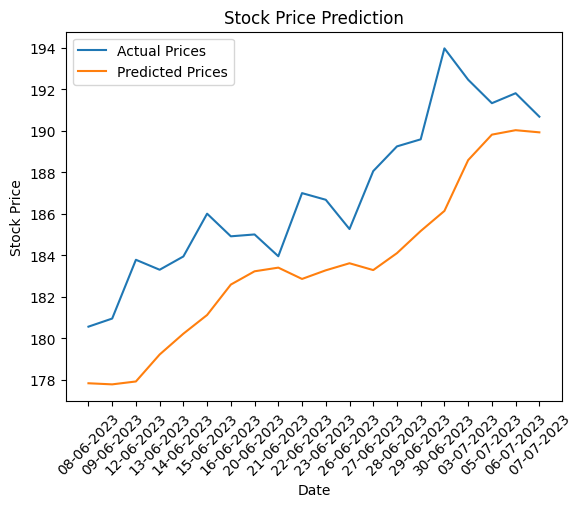

In [15]:
dates = data['Date'].values[-len(predictions):]  # Assuming your CSV file has a 'Date' column
plt.plot(dates, actual_values, label='Actual Prices')
plt.plot(dates, predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()
